# Centerline velocity plot

In [2]:
import numpy as np
import itsinv
import pandas as pd
import scipy
import tqdm
import matplotlib.pyplot as plt
import pickle

# Pick profile

In [3]:
profile = 'center'
#profile = 'valerie'

## Load points

In [4]:
match profile:
    case 'center' :
        points = pd.read_csv("./centerline_points_100m.csv")
    case 'valerie' :
        points = pd.read_csv("./valerie_100m.csv")
    case 'cross' :
        points = pd.read_csv("./cross_100m.csv")

## Iterate through them, inverting for velocity timeseries then interpolating it onto fixed times

In [5]:
# Interpolate to daily velocities
s_in_day = 60 * 60 * 24
epoch = 2015
epoch = np.datetime64(str(epoch), "s")

# datetime64 bounds and steps
t0 = np.datetime64("2016-01-01")
t1 = np.datetime64("2024-01-01")
dt = np.timedelta64(1, "D")
nstep = int((t1 - t0) / dt)
tsteps = np.array([t0 + dt * i for i in range(nstep)]).astype("datetime64[ns]")

In [8]:
speeds = np.zeros((len(tsteps), len(points)))

for i, point in tqdm.tqdm(points.iterrows(), total=len(points)):
    try:
        vpnt = itsinv.single_point_inversion((point.X, point.Y), lt=1e-4, sat_filt=["1A",'1B'], start_date=t0, stop_date=t1, return_data=False)
    except Exception as e:
        print(e)
        continue
    if(len(vpnt["time"]) < 3):
        continue
    v = np.sqrt(vpnt["vx"]**2 + vpnt["vy"]**2)
    cs = scipy.interpolate.CubicSpline(vpnt["time"].to_numpy().astype("datetime64[ns]"), v)
    speeds[:,i] = cs(tsteps)

  0%|                                                   | 0/277 [00:00<?, ?it/s]

original xy (-3313121.5713822, 262837.451264738) 3413 maps to datacube (-3313121.5713822, 262837.451264738) EPSG:3413


  0%|▏                                          | 1/277 [00:05<24:34,  5.34s/it]

original xy (-3313076.57695381, 262748.145601908) 3413 maps to datacube (-3313076.57695381, 262748.145601908) EPSG:3413


  1%|▎                                          | 2/277 [00:09<20:13,  4.41s/it]

original xy (-3313031.58252541, 262658.839939079) 3413 maps to datacube (-3313031.58252541, 262658.839939079) EPSG:3413


  1%|▍                                          | 3/277 [00:12<18:10,  3.98s/it]

original xy (-3312986.58809702, 262569.534276249) 3413 maps to datacube (-3312986.58809702, 262569.534276249) EPSG:3413


  1%|▌                                          | 4/277 [00:16<17:27,  3.84s/it]

original xy (-3312941.59366862, 262480.22861342) 3413 maps to datacube (-3312941.59366862, 262480.22861342) EPSG:3413


  2%|▊                                          | 5/277 [00:19<17:12,  3.80s/it]

original xy (-3312896.59924023, 262390.922950591) 3413 maps to datacube (-3312896.59924023, 262390.922950591) EPSG:3413


  2%|▉                                          | 6/277 [00:24<18:52,  4.18s/it]

original xy (-3312851.60481183, 262301.617287761) 3413 maps to datacube (-3312851.60481183, 262301.617287761) EPSG:3413


  3%|█                                          | 7/277 [00:28<17:41,  3.93s/it]

original xy (-3312806.61038344, 262212.311624932) 3413 maps to datacube (-3312806.61038344, 262212.311624932) EPSG:3413


  3%|█▏                                         | 8/277 [00:31<17:05,  3.81s/it]

original xy (-3312761.61595504, 262123.005962102) 3413 maps to datacube (-3312761.61595504, 262123.005962102) EPSG:3413


  3%|█▍                                         | 9/277 [00:36<18:41,  4.18s/it]

original xy (-3312716.62152665, 262033.700299273) 3413 maps to datacube (-3312716.62152665, 262033.700299273) EPSG:3413


  4%|█▌                                        | 10/277 [00:40<18:19,  4.12s/it]

original xy (-3312671.62709825, 261944.394636443) 3413 maps to datacube (-3312671.62709825, 261944.394636443) EPSG:3413


  4%|█▋                                        | 11/277 [00:45<19:03,  4.30s/it]

original xy (-3312626.63266986, 261855.088973614) 3413 maps to datacube (-3312626.63266986, 261855.088973614) EPSG:3413


  4%|█▊                                        | 12/277 [00:54<25:45,  5.83s/it]

original xy (-3312581.63824146, 261765.783310784) 3413 maps to datacube (-3312581.63824146, 261765.783310784) EPSG:3413


  5%|█▉                                        | 13/277 [01:02<28:01,  6.37s/it]

original xy (-3312536.64381307, 261676.477647955) 3413 maps to datacube (-3312536.64381307, 261676.477647955) EPSG:3413


  5%|██                                        | 14/277 [01:07<25:34,  5.84s/it]

original xy (-3312491.64938467, 261587.171985126) 3413 maps to datacube (-3312491.64938467, 261587.171985126) EPSG:3413


  5%|██▎                                       | 15/277 [01:11<23:20,  5.35s/it]

original xy (-3312446.65495628, 261497.866322296) 3413 maps to datacube (-3312446.65495628, 261497.866322296) EPSG:3413


  6%|██▍                                       | 16/277 [01:14<20:39,  4.75s/it]

original xy (-3312401.66052788, 261408.560659467) 3413 maps to datacube (-3312401.66052788, 261408.560659467) EPSG:3413


  6%|██▌                                       | 17/277 [01:18<19:40,  4.54s/it]

original xy (-3312356.66609949, 261319.254996637) 3413 maps to datacube (-3312356.66609949, 261319.254996637) EPSG:3413


  6%|██▋                                       | 18/277 [01:24<20:49,  4.82s/it]

original xy (-3312311.67167109, 261229.949333808) 3413 maps to datacube (-3312311.67167109, 261229.949333808) EPSG:3413


  7%|██▉                                       | 19/277 [01:28<19:31,  4.54s/it]

original xy (-3312266.6772427, 261140.643670978) 3413 maps to datacube (-3312266.6772427, 261140.643670978) EPSG:3413


  7%|███                                       | 20/277 [01:32<18:58,  4.43s/it]

original xy (-3312221.6828143, 261051.338008149) 3413 maps to datacube (-3312221.6828143, 261051.338008149) EPSG:3413


  8%|███▏                                      | 21/277 [01:37<20:03,  4.70s/it]

original xy (-3312176.68838591, 260962.032345319) 3413 maps to datacube (-3312176.68838591, 260962.032345319) EPSG:3413


  8%|███▎                                      | 22/277 [01:44<22:36,  5.32s/it]

original xy (-3312131.69395751, 260872.72668249) 3413 maps to datacube (-3312131.69395751, 260872.72668249) EPSG:3413


  8%|███▍                                      | 23/277 [01:50<23:26,  5.54s/it]

original xy (-3312086.69952912, 260783.42101966) 3413 maps to datacube (-3312086.69952912, 260783.42101966) EPSG:3413


  9%|███▋                                      | 24/277 [01:55<22:45,  5.40s/it]

original xy (-3312041.70510072, 260694.115356831) 3413 maps to datacube (-3312041.70510072, 260694.115356831) EPSG:3413


  9%|███▊                                      | 25/277 [01:59<21:13,  5.05s/it]

original xy (-3311996.71067233, 260604.809694002) 3413 maps to datacube (-3311996.71067233, 260604.809694002) EPSG:3413


  9%|███▉                                      | 26/277 [02:03<19:59,  4.78s/it]

original xy (-3311951.71624393, 260515.504031172) 3413 maps to datacube (-3311951.71624393, 260515.504031172) EPSG:3413


 10%|████                                      | 27/277 [02:08<19:14,  4.62s/it]

original xy (-3311906.72181554, 260426.198368343) 3413 maps to datacube (-3311906.72181554, 260426.198368343) EPSG:3413


 10%|████▏                                     | 28/277 [02:12<18:42,  4.51s/it]

original xy (-3311861.72738714, 260336.892705513) 3413 maps to datacube (-3311861.72738714, 260336.892705513) EPSG:3413


 10%|████▍                                     | 29/277 [02:17<18:55,  4.58s/it]

original xy (-3311816.73295875, 260247.587042684) 3413 maps to datacube (-3311816.73295875, 260247.587042684) EPSG:3413


 11%|████▌                                     | 30/277 [02:21<18:14,  4.43s/it]

original xy (-3311771.73853035, 260158.281379854) 3413 maps to datacube (-3311771.73853035, 260158.281379854) EPSG:3413


 11%|████▋                                     | 31/277 [02:25<17:39,  4.30s/it]

original xy (-3311726.74410196, 260068.975717025) 3413 maps to datacube (-3311726.74410196, 260068.975717025) EPSG:3413


 12%|████▊                                     | 32/277 [02:29<17:20,  4.25s/it]

original xy (-3311681.74967356, 259979.670054195) 3413 maps to datacube (-3311681.74967356, 259979.670054195) EPSG:3413


 12%|█████                                     | 33/277 [02:34<18:25,  4.53s/it]

original xy (-3311636.75524517, 259890.364391366) 3413 maps to datacube (-3311636.75524517, 259890.364391366) EPSG:3413


 12%|█████▏                                    | 34/277 [02:39<18:58,  4.69s/it]

original xy (-3311591.76081677, 259801.058728537) 3413 maps to datacube (-3311591.76081677, 259801.058728537) EPSG:3413


 13%|█████▎                                    | 35/277 [02:43<18:06,  4.49s/it]

original xy (-3311546.76638838, 259711.753065707) 3413 maps to datacube (-3311546.76638838, 259711.753065707) EPSG:3413


 13%|█████▍                                    | 36/277 [02:47<17:57,  4.47s/it]

original xy (-3311501.77195998, 259622.447402878) 3413 maps to datacube (-3311501.77195998, 259622.447402878) EPSG:3413


 13%|█████▌                                    | 37/277 [02:52<18:30,  4.63s/it]

original xy (-3311456.77753159, 259533.141740048) 3413 maps to datacube (-3311456.77753159, 259533.141740048) EPSG:3413


 14%|█████▊                                    | 38/277 [02:56<17:30,  4.40s/it]

original xy (-3311411.78310319, 259443.836077219) 3413 maps to datacube (-3311411.78310319, 259443.836077219) EPSG:3413


 14%|█████▉                                    | 39/277 [03:00<17:00,  4.29s/it]

original xy (-3311366.7886748, 259354.530414389) 3413 maps to datacube (-3311366.7886748, 259354.530414389) EPSG:3413


 14%|██████                                    | 40/277 [03:05<17:08,  4.34s/it]

original xy (-3311321.7942464, 259265.22475156) 3413 maps to datacube (-3311321.7942464, 259265.22475156) EPSG:3413


 15%|██████▏                                   | 41/277 [03:09<17:28,  4.44s/it]

original xy (-3311276.79981801, 259175.91908873) 3413 maps to datacube (-3311276.79981801, 259175.91908873) EPSG:3413


 15%|██████▎                                   | 42/277 [03:15<18:28,  4.72s/it]

original xy (-3311231.80538961, 259086.613425901) 3413 maps to datacube (-3311231.80538961, 259086.613425901) EPSG:3413


 16%|██████▌                                   | 43/277 [03:22<20:40,  5.30s/it]

original xy (-3311186.81096122, 258997.307763071) 3413 maps to datacube (-3311186.81096122, 258997.307763071) EPSG:3413


 16%|██████▋                                   | 44/277 [03:30<23:56,  6.16s/it]

original xy (-3311141.81653282, 258908.002100242) 3413 maps to datacube (-3311141.81653282, 258908.002100242) EPSG:3413


 16%|██████▊                                   | 45/277 [03:35<22:25,  5.80s/it]

original xy (-3311096.82210443, 258818.696437413) 3413 maps to datacube (-3311096.82210443, 258818.696437413) EPSG:3413


 17%|██████▉                                   | 46/277 [03:39<21:08,  5.49s/it]

original xy (-3311051.82767603, 258729.390774583) 3413 maps to datacube (-3311051.82767603, 258729.390774583) EPSG:3413


 17%|███████▏                                  | 47/277 [03:44<19:46,  5.16s/it]

original xy (-3311006.83324764, 258640.085111754) 3413 maps to datacube (-3311006.83324764, 258640.085111754) EPSG:3413


 17%|███████▎                                  | 48/277 [03:48<19:08,  5.02s/it]

original xy (-3310961.83881924, 258550.779448924) 3413 maps to datacube (-3310961.83881924, 258550.779448924) EPSG:3413


 18%|███████▍                                  | 49/277 [03:53<18:59,  5.00s/it]

original xy (-3310916.84439085, 258461.473786095) 3413 maps to datacube (-3310916.84439085, 258461.473786095) EPSG:3413


 18%|███████▌                                  | 50/277 [03:58<18:09,  4.80s/it]

original xy (-3310871.84996245, 258372.168123265) 3413 maps to datacube (-3310871.84996245, 258372.168123265) EPSG:3413


 18%|███████▋                                  | 51/277 [04:02<17:56,  4.77s/it]

original xy (-3310826.85553406, 258282.862460436) 3413 maps to datacube (-3310826.85553406, 258282.862460436) EPSG:3413


 19%|███████▉                                  | 52/277 [04:07<17:50,  4.76s/it]

original xy (-3310781.86110566, 258193.556797606) 3413 maps to datacube (-3310781.86110566, 258193.556797606) EPSG:3413


 19%|████████                                  | 53/277 [04:12<17:18,  4.64s/it]

original xy (-3310736.86667727, 258104.251134777) 3413 maps to datacube (-3310736.86667727, 258104.251134777) EPSG:3413


 19%|████████▏                                 | 54/277 [04:16<16:50,  4.53s/it]

original xy (-3310691.87224887, 258014.945471948) 3413 maps to datacube (-3310691.87224887, 258014.945471948) EPSG:3413


 20%|████████▎                                 | 55/277 [04:20<16:36,  4.49s/it]

original xy (-3310646.87782048, 257925.639809118) 3413 maps to datacube (-3310646.87782048, 257925.639809118) EPSG:3413


 20%|████████▍                                 | 56/277 [04:26<17:29,  4.75s/it]

original xy (-3310601.88339208, 257836.334146289) 3413 maps to datacube (-3310601.88339208, 257836.334146289) EPSG:3413


 21%|████████▋                                 | 57/277 [04:30<16:51,  4.60s/it]

original xy (-3310556.88896369, 257747.028483459) 3413 maps to datacube (-3310556.88896369, 257747.028483459) EPSG:3413


 21%|████████▊                                 | 58/277 [04:35<16:59,  4.66s/it]

original xy (-3310511.89453529, 257657.72282063) 3413 maps to datacube (-3310511.89453529, 257657.72282063) EPSG:3413


 21%|████████▉                                 | 59/277 [04:40<17:41,  4.87s/it]

original xy (-3310466.9001069, 257568.4171578) 3413 maps to datacube (-3310466.9001069, 257568.4171578) EPSG:3413


 22%|█████████                                 | 60/277 [04:45<17:31,  4.84s/it]

original xy (-3310421.9056785, 257479.111494971) 3413 maps to datacube (-3310421.9056785, 257479.111494971) EPSG:3413


 22%|█████████▏                                | 61/277 [04:49<17:15,  4.79s/it]

original xy (-3310376.91125011, 257389.805832141) 3413 maps to datacube (-3310376.91125011, 257389.805832141) EPSG:3413


 22%|█████████▍                                | 62/277 [04:53<16:17,  4.55s/it]

original xy (-3310331.91682171, 257300.500169312) 3413 maps to datacube (-3310331.91682171, 257300.500169312) EPSG:3413


 23%|█████████▌                                | 63/277 [04:57<15:34,  4.37s/it]

original xy (-3310286.92239332, 257211.194506482) 3413 maps to datacube (-3310286.92239332, 257211.194506482) EPSG:3413


 23%|█████████▋                                | 64/277 [05:01<15:07,  4.26s/it]

original xy (-3310241.92796492, 257121.888843653) 3413 maps to datacube (-3310241.92796492, 257121.888843653) EPSG:3413


 23%|█████████▊                                | 65/277 [05:06<14:58,  4.24s/it]

original xy (-3310196.93353653, 257032.583180824) 3413 maps to datacube (-3310196.93353653, 257032.583180824) EPSG:3413


 24%|██████████                                | 66/277 [05:10<15:01,  4.27s/it]

original xy (-3310151.93910813, 256943.277517994) 3413 maps to datacube (-3310151.93910813, 256943.277517994) EPSG:3413


 24%|██████████▏                               | 67/277 [05:15<15:21,  4.39s/it]

original xy (-3310106.94467974, 256853.971855165) 3413 maps to datacube (-3310106.94467974, 256853.971855165) EPSG:3413


 25%|██████████▎                               | 68/277 [05:19<15:29,  4.45s/it]

original xy (-3310061.95025134, 256764.666192335) 3413 maps to datacube (-3310061.95025134, 256764.666192335) EPSG:3413


 25%|██████████▍                               | 69/277 [05:23<15:12,  4.39s/it]

original xy (-3310016.95582295, 256675.360529506) 3413 maps to datacube (-3310016.95582295, 256675.360529506) EPSG:3413


 25%|██████████▌                               | 70/277 [05:27<14:40,  4.26s/it]

original xy (-3309971.96139455, 256586.054866676) 3413 maps to datacube (-3309971.96139455, 256586.054866676) EPSG:3413


 26%|██████████▊                               | 71/277 [05:32<14:32,  4.23s/it]

original xy (-3309926.96696616, 256496.749203847) 3413 maps to datacube (-3309926.96696616, 256496.749203847) EPSG:3413


 26%|██████████▉                               | 72/277 [05:36<14:35,  4.27s/it]

original xy (-3309881.97253776, 256407.443541017) 3413 maps to datacube (-3309881.97253776, 256407.443541017) EPSG:3413


 26%|███████████                               | 73/277 [05:40<14:44,  4.34s/it]

original xy (-3309836.97810937, 256318.137878188) 3413 maps to datacube (-3309836.97810937, 256318.137878188) EPSG:3413


 27%|███████████▏                              | 74/277 [05:45<15:15,  4.51s/it]

original xy (-3309791.98368097, 256228.832215359) 3413 maps to datacube (-3309791.98368097, 256228.832215359) EPSG:3413


 27%|███████████▎                              | 75/277 [05:50<15:05,  4.48s/it]

original xy (-3309746.98925258, 256139.526552529) 3413 maps to datacube (-3309746.98925258, 256139.526552529) EPSG:3413


 27%|███████████▌                              | 76/277 [05:55<16:12,  4.84s/it]

original xy (-3309701.99482418, 256050.2208897) 3413 maps to datacube (-3309701.99482418, 256050.2208897) EPSG:3413


 28%|███████████▋                              | 77/277 [06:00<15:27,  4.64s/it]

original xy (-3309657.00039579, 255960.91522687) 3413 maps to datacube (-3309657.00039579, 255960.91522687) EPSG:3413


 28%|███████████▊                              | 78/277 [06:05<15:43,  4.74s/it]

original xy (-3309612.00596739, 255871.609564041) 3413 maps to datacube (-3309612.00596739, 255871.609564041) EPSG:3413


 29%|███████████▉                              | 79/277 [06:10<16:04,  4.87s/it]

original xy (-3309567.011539, 255782.303901211) 3413 maps to datacube (-3309567.011539, 255782.303901211) EPSG:3413


 29%|████████████▏                             | 80/277 [06:15<15:57,  4.86s/it]

original xy (-3309522.0171106, 255692.998238382) 3413 maps to datacube (-3309522.0171106, 255692.998238382) EPSG:3413


 29%|████████████▎                             | 81/277 [06:19<15:32,  4.76s/it]

original xy (-3309477.02268221, 255603.692575552) 3413 maps to datacube (-3309477.02268221, 255603.692575552) EPSG:3413


 30%|████████████▍                             | 82/277 [06:24<15:34,  4.79s/it]

original xy (-3309432.02825381, 255514.386912723) 3413 maps to datacube (-3309432.02825381, 255514.386912723) EPSG:3413


 30%|████████████▌                             | 83/277 [06:28<14:49,  4.59s/it]

original xy (-3309387.03382542, 255425.081249893) 3413 maps to datacube (-3309387.03382542, 255425.081249893) EPSG:3413


 30%|████████████▋                             | 84/277 [06:32<14:28,  4.50s/it]

original xy (-3309342.03939702, 255335.775587064) 3413 maps to datacube (-3309342.03939702, 255335.775587064) EPSG:3413


 31%|████████████▉                             | 85/277 [06:37<14:49,  4.63s/it]

original xy (-3309297.04496863, 255246.469924235) 3413 maps to datacube (-3309297.04496863, 255246.469924235) EPSG:3413


 31%|█████████████                             | 86/277 [06:42<15:11,  4.77s/it]

original xy (-3309252.05054023, 255157.164261405) 3413 maps to datacube (-3309252.05054023, 255157.164261405) EPSG:3413


 31%|█████████████▏                            | 87/277 [06:47<14:36,  4.61s/it]

original xy (-3309207.05611184, 255067.858598576) 3413 maps to datacube (-3309207.05611184, 255067.858598576) EPSG:3413


 32%|█████████████▎                            | 88/277 [06:51<14:23,  4.57s/it]

original xy (-3309162.06168344, 254978.552935746) 3413 maps to datacube (-3309162.06168344, 254978.552935746) EPSG:3413


 32%|█████████████▍                            | 89/277 [06:56<14:29,  4.62s/it]

original xy (-3309117.06725505, 254889.247272917) 3413 maps to datacube (-3309117.06725505, 254889.247272917) EPSG:3413


 32%|█████████████▋                            | 90/277 [07:02<16:12,  5.20s/it]

original xy (-3309072.07282665, 254799.941610087) 3413 maps to datacube (-3309072.07282665, 254799.941610087) EPSG:3413


 33%|█████████████▊                            | 91/277 [07:10<18:40,  6.02s/it]

original xy (-3309027.07839826, 254710.635947258) 3413 maps to datacube (-3309027.07839826, 254710.635947258) EPSG:3413


 33%|█████████████▉                            | 92/277 [07:17<19:20,  6.27s/it]

original xy (-3308982.08396986, 254621.330284428) 3413 maps to datacube (-3308982.08396986, 254621.330284428) EPSG:3413


 34%|██████████████                            | 93/277 [07:21<17:11,  5.60s/it]

original xy (-3308937.08954147, 254532.024621599) 3413 maps to datacube (-3308937.08954147, 254532.024621599) EPSG:3413


 34%|██████████████▎                           | 94/277 [07:26<16:21,  5.36s/it]

original xy (-3308892.09511307, 254442.71895877) 3413 maps to datacube (-3308892.09511307, 254442.71895877) EPSG:3413


 34%|██████████████▍                           | 95/277 [07:31<16:09,  5.33s/it]

original xy (-3308847.10068468, 254353.41329594) 3413 maps to datacube (-3308847.10068468, 254353.41329594) EPSG:3413


 35%|██████████████▌                           | 96/277 [07:36<15:10,  5.03s/it]

original xy (-3308802.10625628, 254264.107633111) 3413 maps to datacube (-3308802.10625628, 254264.107633111) EPSG:3413


 35%|██████████████▋                           | 97/277 [07:40<14:12,  4.74s/it]

original xy (-3308757.11182789, 254174.801970281) 3413 maps to datacube (-3308757.11182789, 254174.801970281) EPSG:3413


 35%|██████████████▊                           | 98/277 [07:44<14:10,  4.75s/it]

original xy (-3308712.11739949, 254085.496307452) 3413 maps to datacube (-3308712.11739949, 254085.496307452) EPSG:3413


 36%|███████████████                           | 99/277 [07:49<13:33,  4.57s/it]

original xy (-3308671.78202517, 253994.192999185) 3413 maps to datacube (-3308671.78202517, 253994.192999185) EPSG:3413


 36%|██████████████▊                          | 100/277 [07:53<13:06,  4.45s/it]

original xy (-3308638.11204177, 253900.031795827) 3413 maps to datacube (-3308638.11204177, 253900.031795827) EPSG:3413


 36%|██████████████▉                          | 101/277 [07:56<12:25,  4.23s/it]

original xy (-3308604.44205837, 253805.870592468) 3413 maps to datacube (-3308604.44205837, 253805.870592468) EPSG:3413


 37%|███████████████                          | 102/277 [08:00<12:04,  4.14s/it]

original xy (-3308570.77207498, 253711.709389109) 3413 maps to datacube (-3308570.77207498, 253711.709389109) EPSG:3413


 37%|███████████████▏                         | 103/277 [08:04<11:53,  4.10s/it]

original xy (-3308537.10209158, 253617.548185751) 3413 maps to datacube (-3308537.10209158, 253617.548185751) EPSG:3413


 38%|███████████████▍                         | 104/277 [08:08<11:37,  4.03s/it]

original xy (-3308503.43210818, 253523.386982392) 3413 maps to datacube (-3308503.43210818, 253523.386982392) EPSG:3413


 38%|███████████████▌                         | 105/277 [08:12<11:10,  3.90s/it]

original xy (-3308469.76212478, 253429.225779033) 3413 maps to datacube (-3308469.76212478, 253429.225779033) EPSG:3413


 38%|███████████████▋                         | 106/277 [08:16<11:10,  3.92s/it]

original xy (-3308436.09214138, 253335.064575674) 3413 maps to datacube (-3308436.09214138, 253335.064575674) EPSG:3413


 39%|███████████████▊                         | 107/277 [08:21<11:54,  4.20s/it]

original xy (-3308402.42215798, 253240.903372316) 3413 maps to datacube (-3308402.42215798, 253240.903372316) EPSG:3413


 39%|███████████████▉                         | 108/277 [08:25<11:33,  4.10s/it]

original xy (-3308368.75217459, 253146.742168957) 3413 maps to datacube (-3308368.75217459, 253146.742168957) EPSG:3413


 39%|████████████████▏                        | 109/277 [08:29<11:20,  4.05s/it]

original xy (-3308335.08219119, 253052.580965598) 3413 maps to datacube (-3308335.08219119, 253052.580965598) EPSG:3413


 40%|████████████████▎                        | 110/277 [08:33<11:29,  4.13s/it]

original xy (-3308301.41220779, 252958.41976224) 3413 maps to datacube (-3308301.41220779, 252958.41976224) EPSG:3413


 40%|████████████████▍                        | 111/277 [08:37<11:15,  4.07s/it]

original xy (-3308267.74222439, 252864.258558881) 3413 maps to datacube (-3308267.74222439, 252864.258558881) EPSG:3413


 40%|████████████████▌                        | 112/277 [08:41<11:29,  4.18s/it]

original xy (-3308234.07224099, 252770.097355522) 3413 maps to datacube (-3308234.07224099, 252770.097355522) EPSG:3413


 41%|████████████████▋                        | 113/277 [08:46<12:02,  4.40s/it]

original xy (-3308200.40225759, 252675.936152163) 3413 maps to datacube (-3308200.40225759, 252675.936152163) EPSG:3413


 41%|████████████████▊                        | 114/277 [08:51<12:14,  4.51s/it]

original xy (-3308166.7322742, 252581.774948805) 3413 maps to datacube (-3308166.7322742, 252581.774948805) EPSG:3413


 42%|█████████████████                        | 115/277 [08:56<12:44,  4.72s/it]

original xy (-3308133.0622908, 252487.613745446) 3413 maps to datacube (-3308133.0622908, 252487.613745446) EPSG:3413


 42%|█████████████████▏                       | 116/277 [09:01<12:37,  4.70s/it]

original xy (-3308099.3923074, 252393.452542087) 3413 maps to datacube (-3308099.3923074, 252393.452542087) EPSG:3413


 42%|█████████████████▎                       | 117/277 [09:05<11:47,  4.42s/it]

original xy (-3308065.722324, 252299.291338728) 3413 maps to datacube (-3308065.722324, 252299.291338728) EPSG:3413


 43%|█████████████████▍                       | 118/277 [09:08<11:12,  4.23s/it]

original xy (-3308032.0523406, 252205.13013537) 3413 maps to datacube (-3308032.0523406, 252205.13013537) EPSG:3413


 43%|█████████████████▌                       | 119/277 [09:13<11:18,  4.29s/it]

original xy (-3307998.38235721, 252110.968932011) 3413 maps to datacube (-3307998.38235721, 252110.968932011) EPSG:3413


 43%|█████████████████▊                       | 120/277 [09:17<10:54,  4.17s/it]

original xy (-3307964.71237381, 252016.807728652) 3413 maps to datacube (-3307964.71237381, 252016.807728652) EPSG:3413


 44%|█████████████████▉                       | 121/277 [09:21<10:45,  4.14s/it]

original xy (-3307931.04239041, 251922.646525294) 3413 maps to datacube (-3307931.04239041, 251922.646525294) EPSG:3413


 44%|██████████████████                       | 122/277 [09:25<10:43,  4.15s/it]

original xy (-3307897.37240701, 251828.485321935) 3413 maps to datacube (-3307897.37240701, 251828.485321935) EPSG:3413


 44%|██████████████████▏                      | 123/277 [09:30<11:12,  4.37s/it]

original xy (-3307860.38878929, 251735.707670715) 3413 maps to datacube (-3307860.38878929, 251735.707670715) EPSG:3413


 45%|██████████████████▎                      | 124/277 [09:34<11:21,  4.45s/it]

original xy (-3307817.10409698, 251645.560926951) 3413 maps to datacube (-3307817.10409698, 251645.560926951) EPSG:3413


 45%|██████████████████▌                      | 125/277 [09:38<10:48,  4.27s/it]

original xy (-3307773.81940466, 251555.414183188) 3413 maps to datacube (-3307773.81940466, 251555.414183188) EPSG:3413


 45%|██████████████████▋                      | 126/277 [09:42<10:26,  4.15s/it]

original xy (-3307730.53471235, 251465.267439424) 3413 maps to datacube (-3307730.53471235, 251465.267439424) EPSG:3413


 46%|██████████████████▊                      | 127/277 [09:46<10:09,  4.06s/it]

original xy (-3307687.25002003, 251375.12069566) 3413 maps to datacube (-3307687.25002003, 251375.12069566) EPSG:3413


 46%|██████████████████▉                      | 128/277 [09:50<09:48,  3.95s/it]

original xy (-3307643.96532772, 251284.973951897) 3413 maps to datacube (-3307643.96532772, 251284.973951897) EPSG:3413


 47%|███████████████████                      | 129/277 [09:53<09:32,  3.87s/it]

original xy (-3307600.6806354, 251194.827208133) 3413 maps to datacube (-3307600.6806354, 251194.827208133) EPSG:3413


 47%|███████████████████▏                     | 130/277 [09:57<09:42,  3.96s/it]

original xy (-3307557.39594309, 251104.68046437) 3413 maps to datacube (-3307557.39594309, 251104.68046437) EPSG:3413


 47%|███████████████████▍                     | 131/277 [10:02<09:46,  4.02s/it]

original xy (-3307514.11125077, 251014.533720606) 3413 maps to datacube (-3307514.11125077, 251014.533720606) EPSG:3413


 48%|███████████████████▌                     | 132/277 [10:05<09:24,  3.89s/it]

original xy (-3307470.82655846, 250924.386976843) 3413 maps to datacube (-3307470.82655846, 250924.386976843) EPSG:3413


 48%|███████████████████▋                     | 133/277 [10:09<09:10,  3.82s/it]

original xy (-3307427.54186614, 250834.240233079) 3413 maps to datacube (-3307427.54186614, 250834.240233079) EPSG:3413


 48%|███████████████████▊                     | 134/277 [10:13<09:02,  3.80s/it]

original xy (-3307384.25717383, 250744.093489316) 3413 maps to datacube (-3307384.25717383, 250744.093489316) EPSG:3413


 49%|███████████████████▉                     | 135/277 [10:16<09:01,  3.81s/it]

original xy (-3307340.2047377, 250654.417232388) 3413 maps to datacube (-3307340.2047377, 250654.417232388) EPSG:3413


 49%|████████████████████▏                    | 136/277 [10:21<09:08,  3.89s/it]

original xy (-3307279.53230943, 250574.925997349) 3413 maps to datacube (-3307279.53230943, 250574.925997349) EPSG:3413


 49%|████████████████████▎                    | 137/277 [10:25<09:23,  4.02s/it]

original xy (-3307218.85988116, 250495.434762309) 3413 maps to datacube (-3307218.85988116, 250495.434762309) EPSG:3413


 50%|████████████████████▍                    | 138/277 [10:29<09:19,  4.03s/it]

original xy (-3307158.1874529, 250415.94352727) 3413 maps to datacube (-3307158.1874529, 250415.94352727) EPSG:3413


 50%|████████████████████▌                    | 139/277 [10:34<09:47,  4.26s/it]

original xy (-3307097.51502463, 250336.45229223) 3413 maps to datacube (-3307097.51502463, 250336.45229223) EPSG:3413


 51%|████████████████████▋                    | 140/277 [10:39<10:32,  4.62s/it]

original xy (-3307036.84259636, 250256.961057191) 3413 maps to datacube (-3307036.84259636, 250256.961057191) EPSG:3413


 51%|████████████████████▊                    | 141/277 [10:44<10:25,  4.60s/it]

original xy (-3306976.17016809, 250177.469822152) 3413 maps to datacube (-3306976.17016809, 250177.469822152) EPSG:3413


 51%|█████████████████████                    | 142/277 [10:48<10:21,  4.61s/it]

original xy (-3306915.49773983, 250097.978587112) 3413 maps to datacube (-3306915.49773983, 250097.978587112) EPSG:3413


 52%|█████████████████████▏                   | 143/277 [10:53<10:00,  4.48s/it]

original xy (-3306854.82531156, 250018.487352073) 3413 maps to datacube (-3306854.82531156, 250018.487352073) EPSG:3413


 52%|█████████████████████▎                   | 144/277 [11:00<12:10,  5.49s/it]

original xy (-3306783.13183892, 249949.180972519) 3413 maps to datacube (-3306783.13183892, 249949.180972519) EPSG:3413


 52%|█████████████████████▍                   | 145/277 [11:08<13:34,  6.17s/it]

original xy (-3306708.66484765, 249882.437679133) 3413 maps to datacube (-3306708.66484765, 249882.437679133) EPSG:3413


 53%|█████████████████████▌                   | 146/277 [11:16<14:47,  6.78s/it]

original xy (-3306634.19785639, 249815.694385746) 3413 maps to datacube (-3306634.19785639, 249815.694385746) EPSG:3413


 53%|█████████████████████▊                   | 147/277 [11:21<13:20,  6.16s/it]

original xy (-3306559.73086513, 249748.951092359) 3413 maps to datacube (-3306559.73086513, 249748.951092359) EPSG:3413


 53%|█████████████████████▉                   | 148/277 [11:26<12:34,  5.85s/it]

original xy (-3306485.26387386, 249682.207798972) 3413 maps to datacube (-3306485.26387386, 249682.207798972) EPSG:3413


 54%|██████████████████████                   | 149/277 [11:34<13:50,  6.49s/it]

original xy (-3306410.7968826, 249615.464505586) 3413 maps to datacube (-3306410.7968826, 249615.464505586) EPSG:3413


 54%|██████████████████████▏                  | 150/277 [11:42<14:38,  6.92s/it]

original xy (-3306336.32989133, 249548.721212199) 3413 maps to datacube (-3306336.32989133, 249548.721212199) EPSG:3413


 55%|██████████████████████▎                  | 151/277 [11:49<14:44,  7.02s/it]

original xy (-3306261.86290007, 249481.977918812) 3413 maps to datacube (-3306261.86290007, 249481.977918812) EPSG:3413


 55%|██████████████████████▍                  | 152/277 [11:57<14:57,  7.18s/it]

original xy (-3306187.39590881, 249415.234625425) 3413 maps to datacube (-3306187.39590881, 249415.234625425) EPSG:3413


 55%|██████████████████████▋                  | 153/277 [12:01<12:46,  6.18s/it]

original xy (-3306098.59108376, 249371.439968025) 3413 maps to datacube (-3306098.59108376, 249371.439968025) EPSG:3413


 56%|██████████████████████▊                  | 154/277 [12:05<11:25,  5.57s/it]

original xy (-3306005.95355215, 249333.779806896) 3413 maps to datacube (-3306005.95355215, 249333.779806896) EPSG:3413


 56%|██████████████████████▉                  | 155/277 [12:09<10:32,  5.19s/it]

original xy (-3305913.31602053, 249296.119645768) 3413 maps to datacube (-3305913.31602053, 249296.119645768) EPSG:3413


 56%|███████████████████████                  | 156/277 [12:14<10:17,  5.10s/it]

original xy (-3305820.67848891, 249258.45948464) 3413 maps to datacube (-3305820.67848891, 249258.45948464) EPSG:3413


 57%|███████████████████████▏                 | 157/277 [12:18<09:45,  4.88s/it]

original xy (-3305728.0409573, 249220.799323512) 3413 maps to datacube (-3305728.0409573, 249220.799323512) EPSG:3413


 57%|███████████████████████▍                 | 158/277 [12:23<09:33,  4.82s/it]

original xy (-3305635.40342568, 249183.139162383) 3413 maps to datacube (-3305635.40342568, 249183.139162383) EPSG:3413


 57%|███████████████████████▌                 | 159/277 [12:27<09:10,  4.67s/it]

original xy (-3305542.76589407, 249145.479001255) 3413 maps to datacube (-3305542.76589407, 249145.479001255) EPSG:3413


 58%|███████████████████████▋                 | 160/277 [12:31<08:27,  4.34s/it]

original xy (-3305450.12836245, 249107.818840127) 3413 maps to datacube (-3305450.12836245, 249107.818840127) EPSG:3413


 58%|███████████████████████▊                 | 161/277 [12:35<08:12,  4.24s/it]

original xy (-3305357.49083084, 249070.158678999) 3413 maps to datacube (-3305357.49083084, 249070.158678999) EPSG:3413


 58%|███████████████████████▉                 | 162/277 [12:39<08:07,  4.24s/it]

original xy (-3305261.71393427, 249043.322943213) 3413 maps to datacube (-3305261.71393427, 249043.322943213) EPSG:3413


 59%|████████████████████████▏                | 163/277 [12:45<08:44,  4.60s/it]

original xy (-3305163.30171651, 249025.573706715) 3413 maps to datacube (-3305163.30171651, 249025.573706715) EPSG:3413


 59%|████████████████████████▎                | 164/277 [12:49<08:12,  4.36s/it]

original xy (-3305064.88949875, 249007.824470216) 3413 maps to datacube (-3305064.88949875, 249007.824470216) EPSG:3413


 60%|████████████████████████▍                | 165/277 [12:53<07:59,  4.28s/it]

original xy (-3304966.477281, 248990.075233718) 3413 maps to datacube (-3304966.477281, 248990.075233718) EPSG:3413


 60%|████████████████████████▌                | 166/277 [12:59<08:56,  4.84s/it]

original xy (-3304868.06506324, 248972.32599722) 3413 maps to datacube (-3304868.06506324, 248972.32599722) EPSG:3413


 60%|████████████████████████▋                | 167/277 [13:02<08:01,  4.38s/it]

original xy (-3304769.65284548, 248954.576760722) 3413 maps to datacube (-3304769.65284548, 248954.576760722) EPSG:3413


 61%|████████████████████████▊                | 168/277 [13:06<07:33,  4.16s/it]

original xy (-3304671.24062773, 248936.827524224) 3413 maps to datacube (-3304671.24062773, 248936.827524224) EPSG:3413


 61%|█████████████████████████                | 169/277 [13:10<07:18,  4.06s/it]

original xy (-3304572.82840997, 248919.078287726) 3413 maps to datacube (-3304572.82840997, 248919.078287726) EPSG:3413


 61%|█████████████████████████▏               | 170/277 [13:13<07:01,  3.94s/it]

original xy (-3304474.41619222, 248901.329051228) 3413 maps to datacube (-3304474.41619222, 248901.329051228) EPSG:3413


 62%|█████████████████████████▎               | 171/277 [13:16<06:34,  3.73s/it]

original xy (-3304376.00397446, 248883.57981473) 3413 maps to datacube (-3304376.00397446, 248883.57981473) EPSG:3413


 62%|█████████████████████████▍               | 172/277 [13:20<06:21,  3.63s/it]

original xy (-3304277.5917567, 248865.830578231) 3413 maps to datacube (-3304277.5917567, 248865.830578231) EPSG:3413


 62%|█████████████████████████▌               | 173/277 [13:25<06:50,  3.95s/it]

original xy (-3304179.17953895, 248848.081341733) 3413 maps to datacube (-3304179.17953895, 248848.081341733) EPSG:3413


 63%|█████████████████████████▊               | 174/277 [13:28<06:35,  3.84s/it]

original xy (-3304080.76732119, 248830.332105235) 3413 maps to datacube (-3304080.76732119, 248830.332105235) EPSG:3413


 63%|█████████████████████████▉               | 175/277 [13:32<06:30,  3.83s/it]

original xy (-3303982.35510343, 248812.582868737) 3413 maps to datacube (-3303982.35510343, 248812.582868737) EPSG:3413


 64%|██████████████████████████               | 176/277 [13:35<06:18,  3.75s/it]

original xy (-3303883.93481432, 248794.881332765) 3413 maps to datacube (-3303883.93481432, 248794.881332765) EPSG:3413


 64%|██████████████████████████▏              | 177/277 [13:39<06:14,  3.75s/it]

original xy (-3303785.16168433, 248779.265033813) 3413 maps to datacube (-3303785.16168433, 248779.265033813) EPSG:3413


 64%|██████████████████████████▎              | 178/277 [13:42<05:56,  3.60s/it]

original xy (-3303686.38855435, 248763.648734861) 3413 maps to datacube (-3303686.38855435, 248763.648734861) EPSG:3413


 65%|██████████████████████████▍              | 179/277 [13:46<05:46,  3.54s/it]

original xy (-3303587.61542436, 248748.032435909) 3413 maps to datacube (-3303587.61542436, 248748.032435909) EPSG:3413


 65%|██████████████████████████▋              | 180/277 [13:50<05:52,  3.63s/it]

original xy (-3303488.84229438, 248732.416136957) 3413 maps to datacube (-3303488.84229438, 248732.416136957) EPSG:3413


 65%|██████████████████████████▊              | 181/277 [13:53<05:45,  3.60s/it]

original xy (-3303390.06916439, 248716.799838005) 3413 maps to datacube (-3303390.06916439, 248716.799838005) EPSG:3413


 66%|██████████████████████████▉              | 182/277 [13:57<05:45,  3.64s/it]

original xy (-3303291.29603441, 248701.183539052) 3413 maps to datacube (-3303291.29603441, 248701.183539052) EPSG:3413


 66%|███████████████████████████              | 183/277 [14:01<06:02,  3.85s/it]

original xy (-3303192.52290442, 248685.5672401) 3413 maps to datacube (-3303192.52290442, 248685.5672401) EPSG:3413


 66%|███████████████████████████▏             | 184/277 [14:05<05:47,  3.73s/it]

original xy (-3303093.74977444, 248669.950941148) 3413 maps to datacube (-3303093.74977444, 248669.950941148) EPSG:3413


 67%|███████████████████████████▍             | 185/277 [14:08<05:34,  3.63s/it]

original xy (-3302994.97664445, 248654.334642196) 3413 maps to datacube (-3302994.97664445, 248654.334642196) EPSG:3413


 67%|███████████████████████████▌             | 186/277 [14:12<05:25,  3.58s/it]

original xy (-3302896.20351447, 248638.718343244) 3413 maps to datacube (-3302896.20351447, 248638.718343244) EPSG:3413


 68%|███████████████████████████▋             | 187/277 [14:15<05:14,  3.49s/it]

original xy (-3302797.43038448, 248623.102044292) 3413 maps to datacube (-3302797.43038448, 248623.102044292) EPSG:3413


 68%|███████████████████████████▊             | 188/277 [14:18<05:02,  3.40s/it]

original xy (-3302698.6572545, 248607.48574534) 3413 maps to datacube (-3302698.6572545, 248607.48574534) EPSG:3413


 68%|███████████████████████████▉             | 189/277 [14:22<04:59,  3.40s/it]

original xy (-3302599.88412451, 248591.869446387) 3413 maps to datacube (-3302599.88412451, 248591.869446387) EPSG:3413


 69%|████████████████████████████             | 190/277 [14:25<05:00,  3.46s/it]

original xy (-3302501.11099453, 248576.253147435) 3413 maps to datacube (-3302501.11099453, 248576.253147435) EPSG:3413


 69%|████████████████████████████▎            | 191/277 [14:29<05:05,  3.55s/it]

original xy (-3302402.33786454, 248560.636848483) 3413 maps to datacube (-3302402.33786454, 248560.636848483) EPSG:3413


 69%|████████████████████████████▍            | 192/277 [14:33<05:24,  3.82s/it]

original xy (-3302303.56473456, 248545.020549531) 3413 maps to datacube (-3302303.56473456, 248545.020549531) EPSG:3413


 70%|████████████████████████████▌            | 193/277 [14:37<05:10,  3.70s/it]

original xy (-3302204.79160457, 248529.404250579) 3413 maps to datacube (-3302204.79160457, 248529.404250579) EPSG:3413


 70%|████████████████████████████▋            | 194/277 [14:42<05:43,  4.14s/it]

original xy (-3302106.01847459, 248513.787951627) 3413 maps to datacube (-3302106.01847459, 248513.787951627) EPSG:3413


 70%|████████████████████████████▊            | 195/277 [14:46<05:47,  4.23s/it]

original xy (-3302007.2453446, 248498.171652675) 3413 maps to datacube (-3302007.2453446, 248498.171652675) EPSG:3413


 71%|█████████████████████████████            | 196/277 [14:50<05:26,  4.03s/it]

original xy (-3301908.47221462, 248482.555353723) 3413 maps to datacube (-3301908.47221462, 248482.555353723) EPSG:3413


 71%|█████████████████████████████▏           | 197/277 [14:54<05:18,  3.98s/it]

original xy (-3301809.69908463, 248466.93905477) 3413 maps to datacube (-3301809.69908463, 248466.93905477) EPSG:3413


 71%|█████████████████████████████▎           | 198/277 [14:59<05:39,  4.29s/it]

original xy (-3301710.92595465, 248451.322755818) 3413 maps to datacube (-3301710.92595465, 248451.322755818) EPSG:3413


 72%|█████████████████████████████▍           | 199/277 [15:03<05:43,  4.40s/it]

original xy (-3301612.15282466, 248435.706456866) 3413 maps to datacube (-3301612.15282466, 248435.706456866) EPSG:3413


 72%|█████████████████████████████▌           | 200/277 [15:07<05:29,  4.28s/it]

original xy (-3301513.37969468, 248420.090157914) 3413 maps to datacube (-3301513.37969468, 248420.090157914) EPSG:3413


 73%|█████████████████████████████▊           | 201/277 [15:12<05:27,  4.31s/it]

original xy (-3301414.60656469, 248404.473858962) 3413 maps to datacube (-3301414.60656469, 248404.473858962) EPSG:3413


 73%|█████████████████████████████▉           | 202/277 [15:17<05:52,  4.69s/it]

original xy (-3301315.83343471, 248388.85756001) 3413 maps to datacube (-3301315.83343471, 248388.85756001) EPSG:3413


 73%|██████████████████████████████           | 203/277 [15:25<06:45,  5.48s/it]

original xy (-3301217.06030472, 248373.241261058) 3413 maps to datacube (-3301217.06030472, 248373.241261058) EPSG:3413


 74%|██████████████████████████████▏          | 204/277 [15:29<06:10,  5.08s/it]

original xy (-3301118.28717474, 248357.624962105) 3413 maps to datacube (-3301118.28717474, 248357.624962105) EPSG:3413


 74%|██████████████████████████████▎          | 205/277 [15:33<05:40,  4.73s/it]

original xy (-3301019.51404475, 248342.008663153) 3413 maps to datacube (-3301019.51404475, 248342.008663153) EPSG:3413


 74%|██████████████████████████████▍          | 206/277 [15:39<05:58,  5.04s/it]

original xy (-3300920.74091477, 248326.392364201) 3413 maps to datacube (-3300920.74091477, 248326.392364201) EPSG:3413


 75%|██████████████████████████████▋          | 207/277 [15:44<05:58,  5.12s/it]

original xy (-3300821.96778478, 248310.776065249) 3413 maps to datacube (-3300821.96778478, 248310.776065249) EPSG:3413


 75%|██████████████████████████████▊          | 208/277 [15:48<05:28,  4.76s/it]

original xy (-3300723.1946548, 248295.159766297) 3413 maps to datacube (-3300723.1946548, 248295.159766297) EPSG:3413


 75%|██████████████████████████████▉          | 209/277 [15:52<05:13,  4.61s/it]

original xy (-3300624.42152481, 248279.543467345) 3413 maps to datacube (-3300624.42152481, 248279.543467345) EPSG:3413


 76%|███████████████████████████████          | 210/277 [15:56<04:48,  4.30s/it]

original xy (-3300525.64839483, 248263.927168393) 3413 maps to datacube (-3300525.64839483, 248263.927168393) EPSG:3413


 76%|███████████████████████████████▏         | 211/277 [16:01<04:57,  4.51s/it]

original xy (-3300426.90786706, 248248.108040845) 3413 maps to datacube (-3300426.90786706, 248248.108040845) EPSG:3413


 77%|███████████████████████████████▌         | 213/277 [16:05<03:29,  3.28s/it]

original xy (-3300328.21630129, 248231.984305373) 3413 maps to datacube (-3300328.21630129, 248231.984305373) EPSG:3413
name 'cubefeaturea' is not defined


 77%|███████████████████████████████▋         | 214/277 [16:06<02:41,  2.57s/it]

original xy (-3300229.52473552, 248215.860569901) 3413 maps to datacube (-3300229.52473552, 248215.860569901) EPSG:3413
name 'cubefeaturea' is not defined


 78%|███████████████████████████████▊         | 215/277 [16:07<02:09,  2.08s/it]

original xy (-3300130.83316974, 248199.736834429) 3413 maps to datacube (-3300130.83316974, 248199.736834429) EPSG:3413
name 'cubefeaturea' is not defined


 78%|███████████████████████████████▉         | 216/277 [16:08<01:44,  1.71s/it]

original xy (-3300032.14160397, 248183.613098957) 3413 maps to datacube (-3300032.14160397, 248183.613098957) EPSG:3413
name 'cubefeaturea' is not defined
original xy (-3299933.4500382, 248167.489363484) 3413 maps to datacube (-3299933.4500382, 248167.489363484) EPSG:3413


 78%|████████████████████████████████         | 217/277 [16:14<02:53,  2.90s/it]

original xy (-3299834.75847243, 248151.365628012) 3413 maps to datacube (-3299834.75847243, 248151.365628012) EPSG:3413


 79%|████████████████████████████████▎        | 218/277 [16:19<03:34,  3.64s/it]

original xy (-3299736.06690666, 248135.24189254) 3413 maps to datacube (-3299736.06690666, 248135.24189254) EPSG:3413


 79%|████████████████████████████████▍        | 219/277 [16:24<04:01,  4.16s/it]

original xy (-3299637.37534089, 248119.118157068) 3413 maps to datacube (-3299637.37534089, 248119.118157068) EPSG:3413


 79%|████████████████████████████████▌        | 220/277 [16:30<04:19,  4.55s/it]

original xy (-3299538.68377512, 248102.994421596) 3413 maps to datacube (-3299538.68377512, 248102.994421596) EPSG:3413


 80%|████████████████████████████████▋        | 221/277 [16:37<04:53,  5.23s/it]

original xy (-3299439.99220934, 248086.870686123) 3413 maps to datacube (-3299439.99220934, 248086.870686123) EPSG:3413


 80%|████████████████████████████████▊        | 222/277 [16:43<05:13,  5.70s/it]

original xy (-3299341.30064357, 248070.746950651) 3413 maps to datacube (-3299341.30064357, 248070.746950651) EPSG:3413


 81%|█████████████████████████████████        | 223/277 [16:49<04:57,  5.51s/it]

original xy (-3299248.1227484, 248034.966207025) 3413 maps to datacube (-3299248.1227484, 248034.966207025) EPSG:3413


 81%|█████████████████████████████████▏       | 224/277 [16:53<04:42,  5.32s/it]

original xy (-3299155.44248961, 247997.411318779) 3413 maps to datacube (-3299155.44248961, 247997.411318779) EPSG:3413


 81%|█████████████████████████████████▎       | 225/277 [16:59<04:33,  5.26s/it]

original xy (-3299062.76223083, 247959.856430533) 3413 maps to datacube (-3299062.76223083, 247959.856430533) EPSG:3413


 82%|█████████████████████████████████▍       | 226/277 [17:07<05:17,  6.23s/it]

original xy (-3298970.08197204, 247922.301542287) 3413 maps to datacube (-3298970.08197204, 247922.301542287) EPSG:3413


 82%|█████████████████████████████████▌       | 227/277 [17:16<05:54,  7.10s/it]

original xy (-3298877.40171325, 247884.746654042) 3413 maps to datacube (-3298877.40171325, 247884.746654042) EPSG:3413


 82%|█████████████████████████████████▋       | 228/277 [17:22<05:24,  6.63s/it]

original xy (-3298784.72145447, 247847.191765796) 3413 maps to datacube (-3298784.72145447, 247847.191765796) EPSG:3413


 83%|█████████████████████████████████▉       | 229/277 [17:28<05:07,  6.40s/it]

original xy (-3298692.04119568, 247809.63687755) 3413 maps to datacube (-3298692.04119568, 247809.63687755) EPSG:3413


 83%|██████████████████████████████████       | 230/277 [17:33<04:41,  5.99s/it]

original xy (-3298601.72797684, 247767.156907182) 3413 maps to datacube (-3298601.72797684, 247767.156907182) EPSG:3413


 83%|██████████████████████████████████▏      | 231/277 [17:38<04:23,  5.72s/it]

original xy (-3298514.50439657, 247718.248349178) 3413 maps to datacube (-3298514.50439657, 247718.248349178) EPSG:3413


 84%|██████████████████████████████████▎      | 232/277 [17:43<04:12,  5.62s/it]

original xy (-3298427.28081631, 247669.339791174) 3413 maps to datacube (-3298427.28081631, 247669.339791174) EPSG:3413


 84%|██████████████████████████████████▍      | 233/277 [17:48<04:03,  5.53s/it]

original xy (-3298340.05723605, 247620.431233169) 3413 maps to datacube (-3298340.05723605, 247620.431233169) EPSG:3413


 84%|██████████████████████████████████▋      | 234/277 [17:54<03:55,  5.48s/it]

original xy (-3298252.83365578, 247571.522675165) 3413 maps to datacube (-3298252.83365578, 247571.522675165) EPSG:3413


 85%|██████████████████████████████████▊      | 235/277 [17:59<03:48,  5.44s/it]

original xy (-3298165.61007552, 247522.614117161) 3413 maps to datacube (-3298165.61007552, 247522.614117161) EPSG:3413


 85%|██████████████████████████████████▉      | 236/277 [18:04<03:42,  5.42s/it]

original xy (-3298078.38649526, 247473.705559156) 3413 maps to datacube (-3298078.38649526, 247473.705559156) EPSG:3413


 86%|███████████████████████████████████      | 237/277 [18:10<03:32,  5.32s/it]

original xy (-3297991.16291499, 247424.797001152) 3413 maps to datacube (-3297991.16291499, 247424.797001152) EPSG:3413


 86%|███████████████████████████████████▏     | 238/277 [18:16<03:41,  5.68s/it]

original xy (-3297903.93933473, 247375.888443148) 3413 maps to datacube (-3297903.93933473, 247375.888443148) EPSG:3413


 86%|███████████████████████████████████▍     | 239/277 [18:23<03:53,  6.15s/it]

original xy (-3297816.71575447, 247326.979885143) 3413 maps to datacube (-3297816.71575447, 247326.979885143) EPSG:3413


 87%|███████████████████████████████████▌     | 240/277 [18:29<03:42,  6.03s/it]

original xy (-3297729.4921742, 247278.071327139) 3413 maps to datacube (-3297729.4921742, 247278.071327139) EPSG:3413


 87%|███████████████████████████████████▋     | 241/277 [18:34<03:29,  5.82s/it]

original xy (-3297642.26859394, 247229.162769135) 3413 maps to datacube (-3297642.26859394, 247229.162769135) EPSG:3413


 87%|███████████████████████████████████▊     | 242/277 [18:39<03:13,  5.53s/it]

original xy (-3297555.04501368, 247180.25421113) 3413 maps to datacube (-3297555.04501368, 247180.25421113) EPSG:3413


 88%|███████████████████████████████████▉     | 243/277 [18:44<03:03,  5.41s/it]

original xy (-3297467.82143341, 247131.345653126) 3413 maps to datacube (-3297467.82143341, 247131.345653126) EPSG:3413


 88%|████████████████████████████████████     | 244/277 [18:49<02:53,  5.26s/it]

original xy (-3297380.59785315, 247082.437095122) 3413 maps to datacube (-3297380.59785315, 247082.437095122) EPSG:3413


 88%|████████████████████████████████████▎    | 245/277 [18:54<02:40,  5.02s/it]

original xy (-3297293.37427289, 247033.528537117) 3413 maps to datacube (-3297293.37427289, 247033.528537117) EPSG:3413


 89%|████████████████████████████████████▍    | 246/277 [19:00<02:51,  5.52s/it]

original xy (-3297206.15069262, 246984.619979113) 3413 maps to datacube (-3297206.15069262, 246984.619979113) EPSG:3413


 89%|████████████████████████████████████▌    | 247/277 [19:10<03:20,  6.69s/it]

original xy (-3297118.92711236, 246935.711421109) 3413 maps to datacube (-3297118.92711236, 246935.711421109) EPSG:3413


 90%|████████████████████████████████████▋    | 248/277 [19:17<03:14,  6.70s/it]

original xy (-3297031.7035321, 246886.802863104) 3413 maps to datacube (-3297031.7035321, 246886.802863104) EPSG:3413


 90%|████████████████████████████████████▊    | 249/277 [19:23<03:02,  6.53s/it]

original xy (-3296954.13333586, 246823.760824607) 3413 maps to datacube (-3296954.13333586, 246823.760824607) EPSG:3413


 90%|█████████████████████████████████████    | 250/277 [19:29<02:54,  6.45s/it]

original xy (-3296876.84541715, 246760.305504724) 3413 maps to datacube (-3296876.84541715, 246760.305504724) EPSG:3413


 91%|█████████████████████████████████████▏   | 251/277 [19:37<02:57,  6.84s/it]

original xy (-3296799.55749844, 246696.85018484) 3413 maps to datacube (-3296799.55749844, 246696.85018484) EPSG:3413


 91%|█████████████████████████████████████▎   | 252/277 [19:43<02:44,  6.60s/it]

original xy (-3296722.26957973, 246633.394864956) 3413 maps to datacube (-3296722.26957973, 246633.394864956) EPSG:3413


 91%|█████████████████████████████████████▍   | 253/277 [19:51<02:52,  7.19s/it]

original xy (-3296644.98166102, 246569.939545073) 3413 maps to datacube (-3296644.98166102, 246569.939545073) EPSG:3413


 92%|█████████████████████████████████████▌   | 254/277 [19:59<02:47,  7.29s/it]

original xy (-3296567.69374231, 246506.484225189) 3413 maps to datacube (-3296567.69374231, 246506.484225189) EPSG:3413


 92%|█████████████████████████████████████▋   | 255/277 [20:05<02:31,  6.91s/it]

original xy (-3296490.4058236, 246443.028905305) 3413 maps to datacube (-3296490.4058236, 246443.028905305) EPSG:3413


 92%|█████████████████████████████████████▉   | 256/277 [20:11<02:18,  6.61s/it]

original xy (-3296413.11790489, 246379.573585422) 3413 maps to datacube (-3296413.11790489, 246379.573585422) EPSG:3413


 93%|██████████████████████████████████████   | 257/277 [20:17<02:10,  6.50s/it]

original xy (-3296335.82998618, 246316.118265538) 3413 maps to datacube (-3296335.82998618, 246316.118265538) EPSG:3413


 93%|██████████████████████████████████████▏  | 258/277 [20:23<01:59,  6.31s/it]

original xy (-3296258.54206747, 246252.662945654) 3413 maps to datacube (-3296258.54206747, 246252.662945654) EPSG:3413


 94%|██████████████████████████████████████▎  | 259/277 [20:28<01:49,  6.08s/it]

original xy (-3296181.25414877, 246189.207625771) 3413 maps to datacube (-3296181.25414877, 246189.207625771) EPSG:3413


 94%|██████████████████████████████████████▍  | 260/277 [20:34<01:43,  6.07s/it]

original xy (-3296103.96623006, 246125.752305887) 3413 maps to datacube (-3296103.96623006, 246125.752305887) EPSG:3413


 94%|██████████████████████████████████████▋  | 261/277 [20:39<01:31,  5.72s/it]

original xy (-3296026.67831135, 246062.296986003) 3413 maps to datacube (-3296026.67831135, 246062.296986003) EPSG:3413


 95%|██████████████████████████████████████▊  | 262/277 [20:46<01:28,  5.88s/it]

original xy (-3295949.39039264, 245998.84166612) 3413 maps to datacube (-3295949.39039264, 245998.84166612) EPSG:3413


 95%|██████████████████████████████████████▉  | 263/277 [20:51<01:19,  5.64s/it]

original xy (-3295872.10247393, 245935.386346236) 3413 maps to datacube (-3295872.10247393, 245935.386346236) EPSG:3413


 95%|███████████████████████████████████████  | 264/277 [20:55<01:08,  5.26s/it]

original xy (-3295794.81455522, 245871.931026352) 3413 maps to datacube (-3295794.81455522, 245871.931026352) EPSG:3413


 96%|███████████████████████████████████████▏ | 265/277 [21:00<01:01,  5.10s/it]

original xy (-3295717.52663651, 245808.475706469) 3413 maps to datacube (-3295717.52663651, 245808.475706469) EPSG:3413


 96%|███████████████████████████████████████▎ | 266/277 [21:06<00:58,  5.28s/it]

original xy (-3295640.2387178, 245745.020386585) 3413 maps to datacube (-3295640.2387178, 245745.020386585) EPSG:3413


 96%|███████████████████████████████████████▌ | 267/277 [21:10<00:49,  4.98s/it]

original xy (-3295562.95079909, 245681.565066701) 3413 maps to datacube (-3295562.95079909, 245681.565066701) EPSG:3413


 97%|███████████████████████████████████████▋ | 268/277 [21:14<00:43,  4.81s/it]

original xy (-3295485.66288038, 245618.109746818) 3413 maps to datacube (-3295485.66288038, 245618.109746818) EPSG:3413


 97%|███████████████████████████████████████▊ | 269/277 [21:19<00:38,  4.87s/it]

original xy (-3295408.37496167, 245554.654426934) 3413 maps to datacube (-3295408.37496167, 245554.654426934) EPSG:3413


 97%|███████████████████████████████████████▉ | 270/277 [21:24<00:34,  4.94s/it]

original xy (-3295331.08704296, 245491.19910705) 3413 maps to datacube (-3295331.08704296, 245491.19910705) EPSG:3413


 98%|████████████████████████████████████████ | 271/277 [21:30<00:31,  5.22s/it]

original xy (-3295253.79912425, 245427.743787166) 3413 maps to datacube (-3295253.79912425, 245427.743787166) EPSG:3413


 98%|████████████████████████████████████████▎| 272/277 [21:34<00:24,  4.90s/it]

original xy (-3295176.51120554, 245364.288467283) 3413 maps to datacube (-3295176.51120554, 245364.288467283) EPSG:3413


 99%|████████████████████████████████████████▍| 273/277 [21:41<00:22,  5.53s/it]

original xy (-3295099.22328683, 245300.833147399) 3413 maps to datacube (-3295099.22328683, 245300.833147399) EPSG:3413


 99%|████████████████████████████████████████▌| 274/277 [21:47<00:16,  5.61s/it]

original xy (-3295021.93536812, 245237.377827515) 3413 maps to datacube (-3295021.93536812, 245237.377827515) EPSG:3413


 99%|████████████████████████████████████████▋| 275/277 [21:51<00:10,  5.23s/it]

original xy (-3294944.64744941, 245173.922507632) 3413 maps to datacube (-3294944.64744941, 245173.922507632) EPSG:3413


100%|████████████████████████████████████████▊| 276/277 [21:57<00:05,  5.27s/it]

original xy (-3294867.3595307, 245110.467187748) 3413 maps to datacube (-3294867.3595307, 245110.467187748) EPSG:3413


100%|█████████████████████████████████████████| 277/277 [22:02<00:00,  4.78s/it]


In [9]:
# Save speeds
#with open("speeds_centerline.pkl", mode="wb") as fd:
#    pickle.dump(speeds, fd)
    
match profile:
    case 'center':
        with open("speeds_centerline.pkl", mode="wb") as fd:
            pickle.dump(speeds, fd)
    case 'valerie':
        with open("valerie_centerline.pkl", mode="wb") as fd:
            pickle.dump(speeds, fd)

In [6]:
# Load speeds
match profile:
    case 'center':
        with open("speeds_centerline.pkl", mode="rb") as fd:
            speeds=pickle.load(fd)
    case 'valerie':
        with open("valerie_centerline.pkl", mode="rb") as fd:
            speeds=pickle.load(fd)

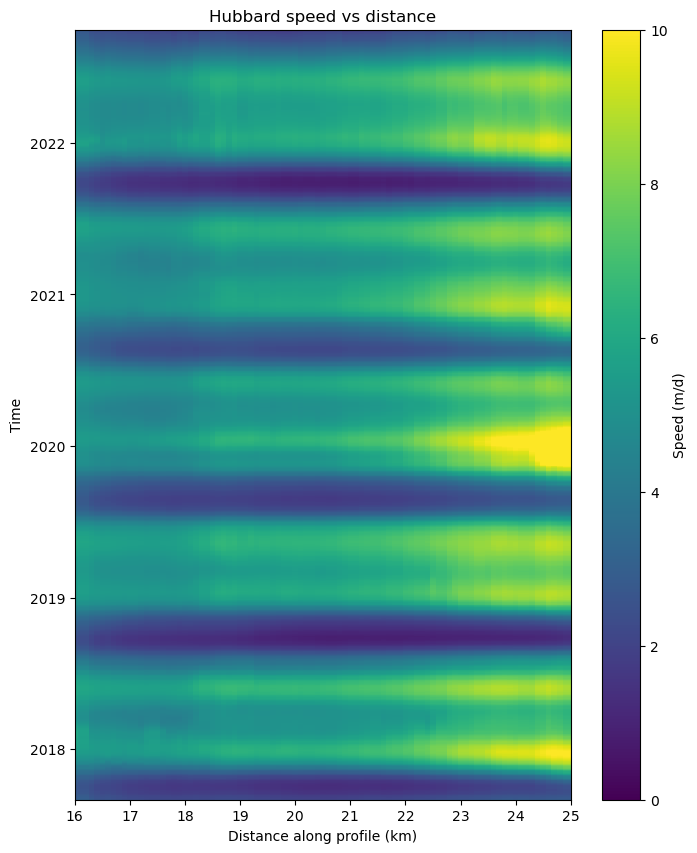

In [32]:
plt.figure(figsize=(8, 10))

match profile:
    case 'center':
        plt.pcolormesh(np.arange(len(points))/10, tsteps, np.fliplr(speeds)/365, cmap="viridis", vmin=0, vmax=10)

        plt.ylabel("Time")
        plt.xlabel("Distance along profile (km)")
        plt.colorbar(label="Speed (m/d)")
        plt.ylim(np.datetime64("2017-09-01"), np.datetime64("2022-10-01"))
        plt.xlim(16, 25)
        #plt.xticks(np.arange(6,20,2),['0','2','4','6','8','10','12'])
        plt.title("Hubbard speed vs distance")
        #plt.savefig("centerline_speeds_term_time.png", bbox_inches="tight", dpi=300)
    
    case 'valerie':
        plt.pcolormesh(np.arange(len(points))/10, tsteps, speeds, cmap="jet", vmin=0, vmax=3000)

        plt.ylabel("Time")
        plt.xlabel("Distance along profile (km)")
        plt.colorbar(label="Speed (m/yr)")
        plt.ylim(np.datetime64("2016-09-01"), np.datetime64("2022-10-01"))
        plt.title("Valerie speed vs distance")
        plt.savefig("valerie_speeds.png", bbox_inches="tight", dpi=300)

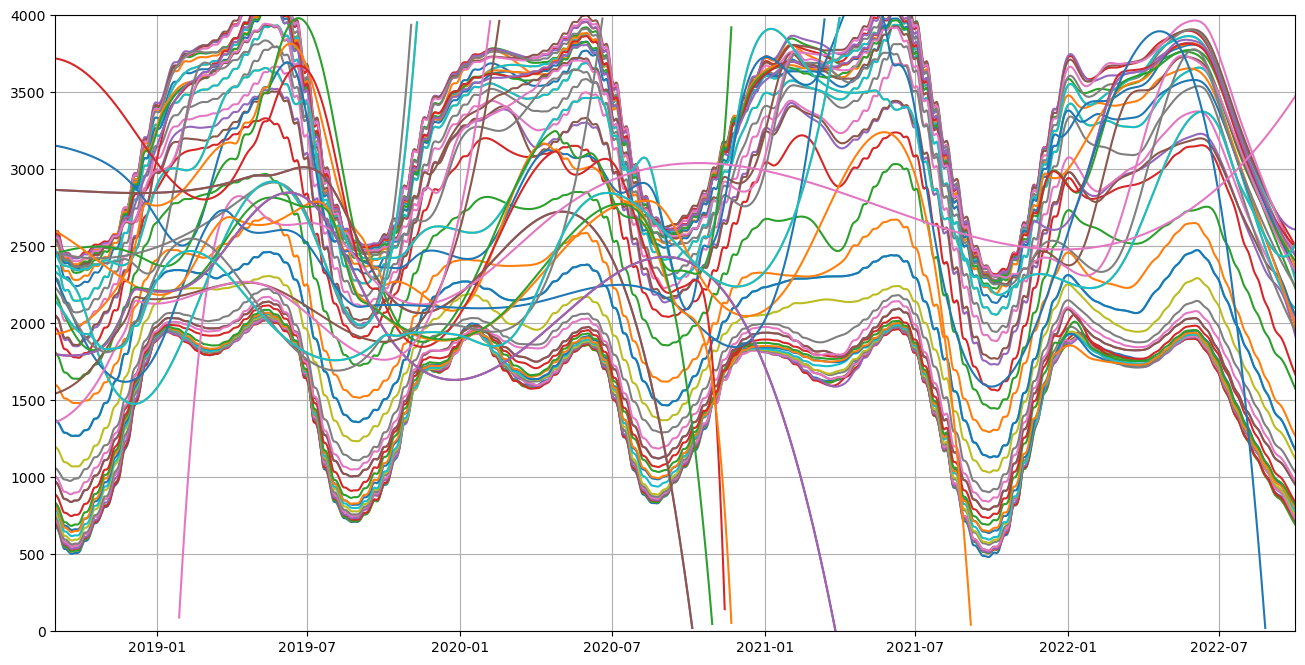

In [67]:
speeds_culled=speeds
speeds_culled[np.abs(speeds)>4000] =  np.nan
speeds_culled[speeds<0] =  np.nan

plt.figure(figsize=(16,8))
plt.plot(tsteps,speeds_culled[:,100:170])
#plt.plot(tsteps,speeds_culled[:,125])

#plt.plot(tsteps,speeds_culled[:,170]-speeds_culled[:,125])
plt.ylim([0,4000])
plt.xlim(np.datetime64("2018-09-01"), np.datetime64("2022-10-01"))
plt.grid()
#plt.pcolormesh(speeds_culled)
#plt.colorbar()
#np.shape(speeds)

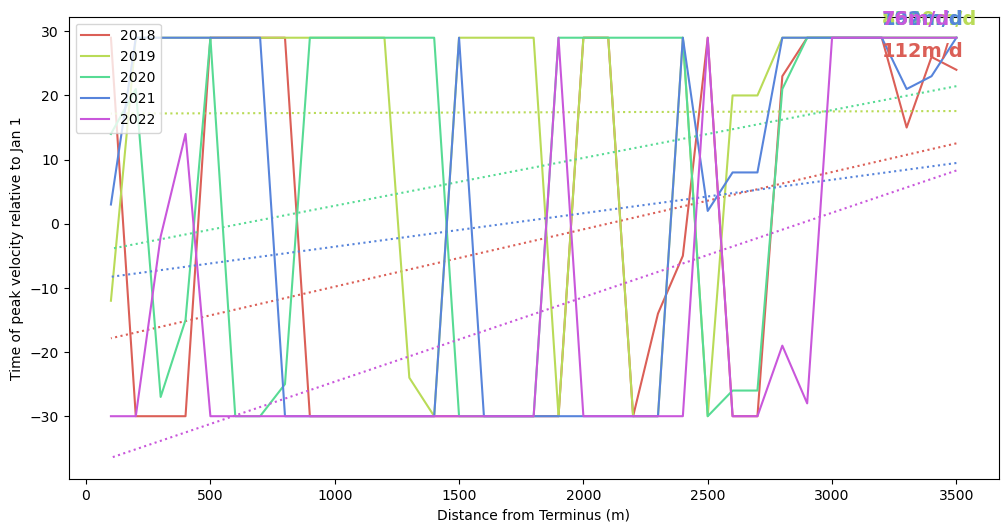

In [68]:
import seaborn as sns

colors = sns.color_palette('hls', 5)
clrs = [c for c in colors for _ in (0, 1)]
fig, ax = plt.subplots(figsize=(12,6))
ax.set_prop_cycle('color', clrs)

# find the position of the first maximum
offset = 30 # check for maximum within 'offset' days of Jan 1
x = np.arange(3500,0,-100)  # distance from terminus, points are in 100 m increments
for yr in range(2018,2023):
    I = np.squeeze(np.where(tsteps==np.datetime64(str(yr))))
    max_pos = np.argmax(speeds[I-offset:I+offset,:],axis=0)
    p=np.polyfit(x,max_pos[140:175],1)
    plt.plot(x, p[0]*x+p[1]-offset,':')
    pl=plt.plot(x, max_pos[140:175]-offset, label=str(yr))
    plt.text(3200,max_pos[140]-offset+2, '{:0.0f}'.format(1/p[0])+'m/d', color=pl[0].get_color(), fontweight='bold', fontsize=14)
plt.legend(loc='upper left')
plt.xlabel('Distance from Terminus (m)')
plt.ylabel('Time of peak velocity relative to Jan 1')
plt.savefig('peak1_propagation.png')

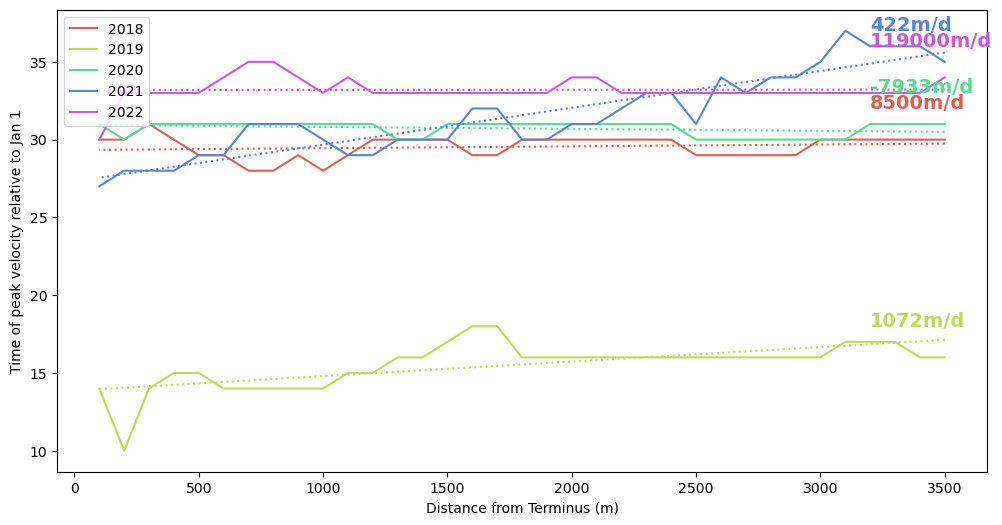

In [242]:
# find the position of the second maximum

colors = sns.color_palette('hls', 5)
clrs = [c for c in colors for _ in (0, 1)]
fig, ax = plt.subplots(figsize=(12,6))
ax.set_prop_cycle('color', clrs)

offset = 40 # check for maximum within 'offset' days of Jan 1
x = np.arange(3500,0,-100)  # distance from terminus, points are in 100 m increments
for yr in range(2018,2023):
    I = np.squeeze(np.where(tsteps==np.datetime64(str(yr)+'-05-01')))
    max_pos = np.argmax(speeds[I-offset:I+offset,:],axis=0)
    p=np.polyfit(x,max_pos[140:175],1)
    plt.plot(x, p[0]*x+p[1]-offset,':')
    pl=plt.plot(x, max_pos[140:175]-offset, label=str(yr))
    plt.text(3200,max_pos[140]-offset+2, '{:0.0f}'.format(1/p[0])+'m/d', color=pl[0].get_color(), fontweight='bold', fontsize=14)
plt.legend(loc='upper left')
plt.xlabel('Distance from Terminus (m)')
plt.ylabel('Time of peak velocity relative to Jan 1')
plt.savefig('peak2_propagation.png')

In [148]:
from rasterio.plot import show
import rasterio as rio
from rasterio.enums import Resampling
from pyproj import Transformer

In [79]:
def pct_clip(array,pct=[2,98]):
    array_min, array_max = np.nanpercentile(array,pct[0]), np.nanpercentile(array,pct[1])
    clip = (array - array_min) / (array_max - array_min)
    clip[clip>1]=1
    clip[clip<0]=0
    return clip

with rio.open('/home/martin/projects/Hubbard2024/images/Planet_Hubbard.tif') as src:
    with rio.open(
            'RGB_Temp.tif', 'w+',
            driver='GTiff',
            dtype= rio.float32,
            count=3,
            crs = src.crs,
            width=src.width,
            height=src.height,
            transform=src.transform,
        ) as dst:
        V = pct_clip(src.read(1))
        dst.write(V,1)
        V = pct_clip(src.read(2))
        dst.write(V,2)
        V = pct_clip(src.read(3))
        dst.write(V,3)
    

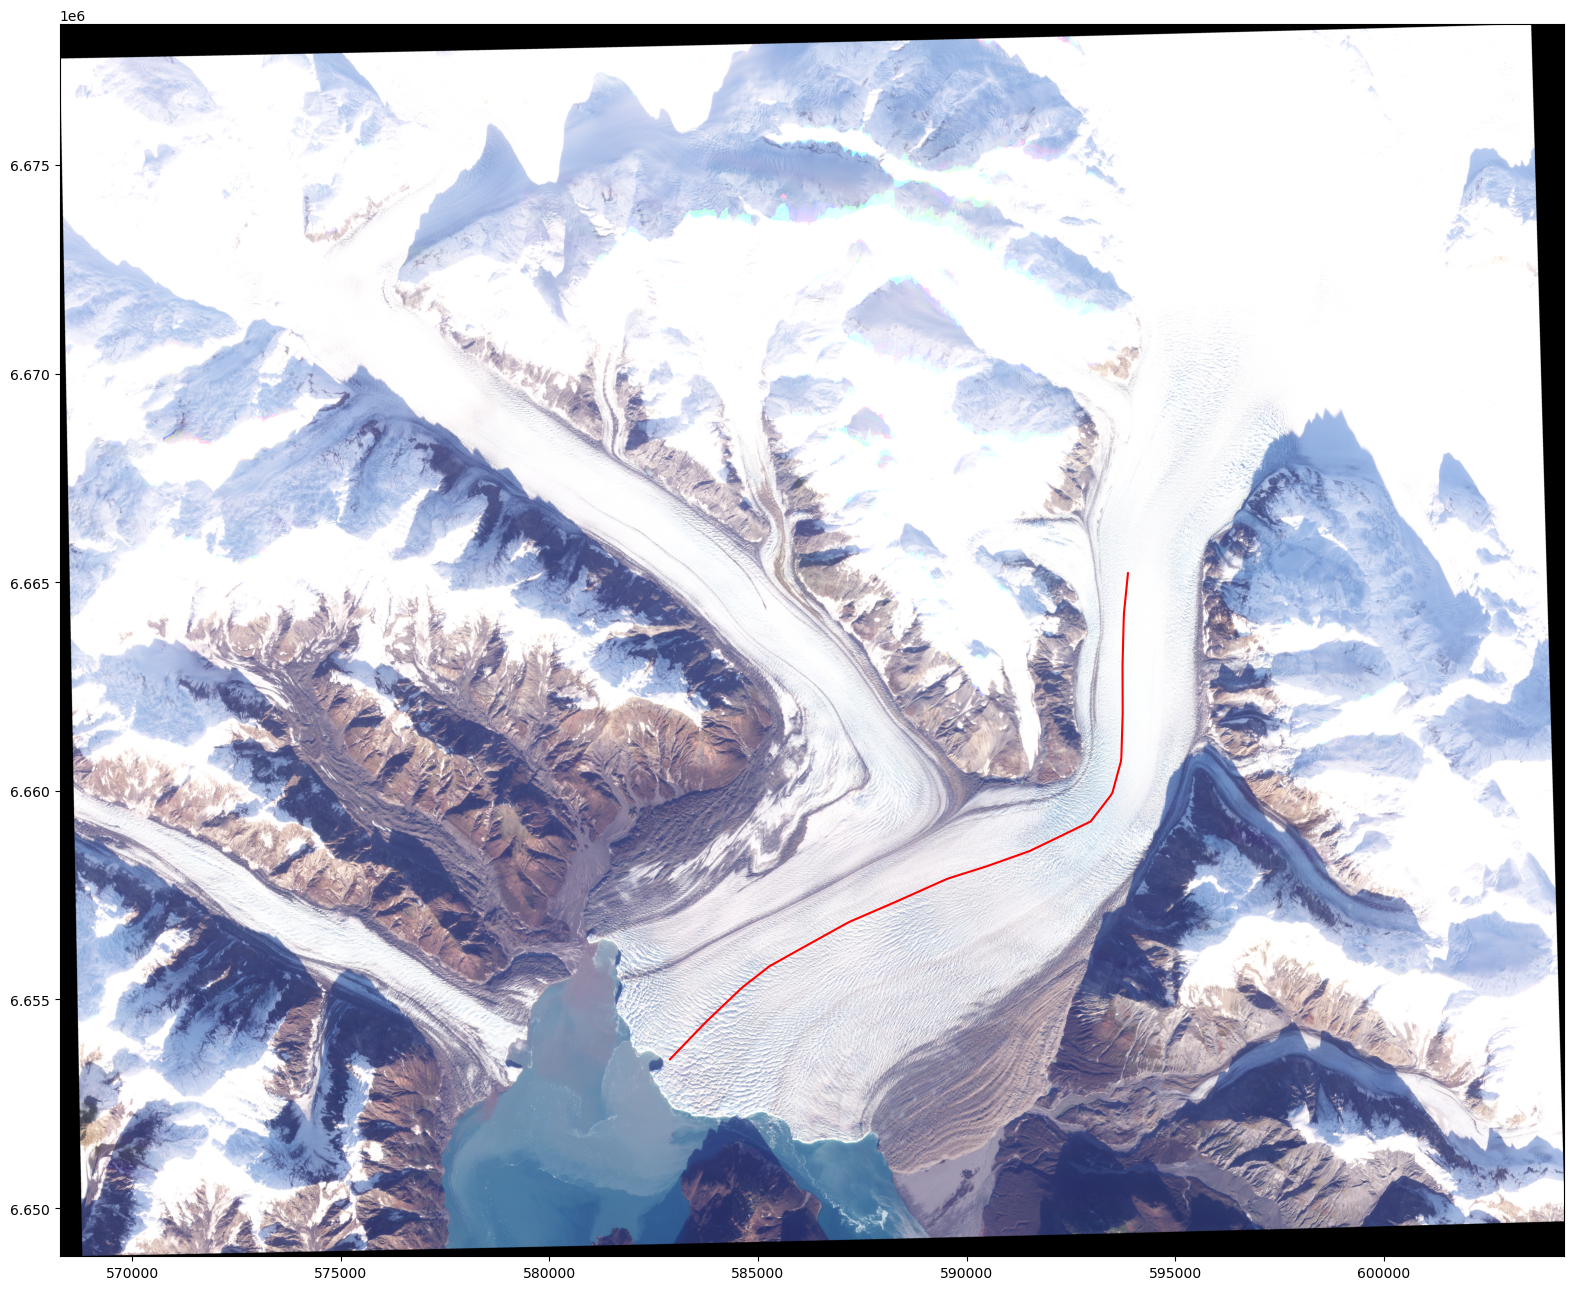

In [104]:
fig,ax=plt.subplots(figsize=(20,16))
with rio.open("RGB_Temp.tif") as src2:
    show(src2.read(),transform=src2.transform,ax=ax)
    
transformer = Transformer.from_crs("epsg:3413", "epsg:32607") # UTM 6N
x, y = transformer.transform(points.X.to_numpy(),points.Y.to_numpy())
ax.plot(x,y,'r')
plt.savefig('map.png')

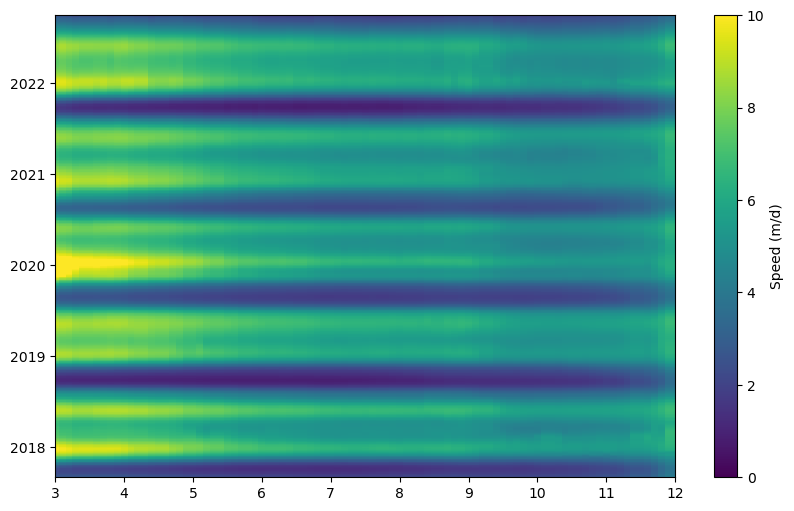

In [65]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(np.arange(len(points))/10,tsteps,speeds/365,vmin=0,vmax=10)
plt.xlim([3,12])
plt.ylim(np.datetime64("2017-09-01"), np.datetime64("2022-10-01"))
plt.colorbar(label="Speed (m/d)")
plt.savefig('v1.png')

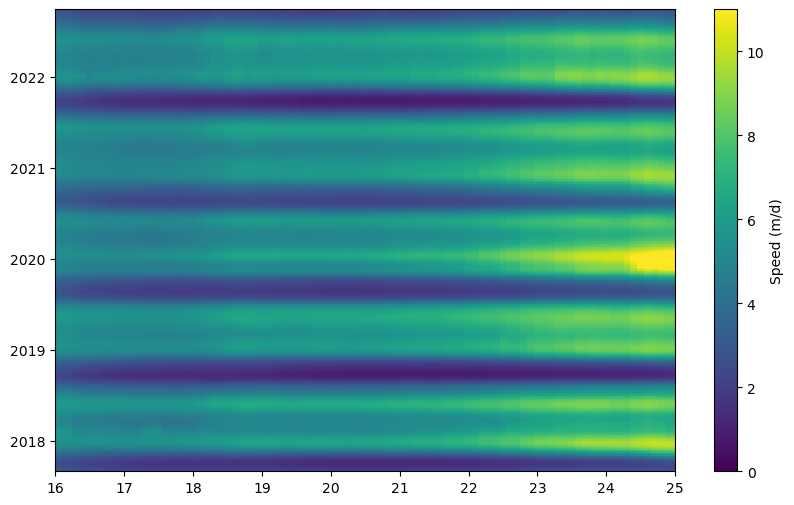

In [63]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(np.arange(len(points))/10,tsteps,np.fliplr(speeds)/365,vmin=0,vmax=11)
plt.xlim([16,25])
plt.ylim(np.datetime64("2017-09-01"), np.datetime64("2022-10-01"))
plt.colorbar(label="Speed (m/d)")
plt.savefig('v2.png')

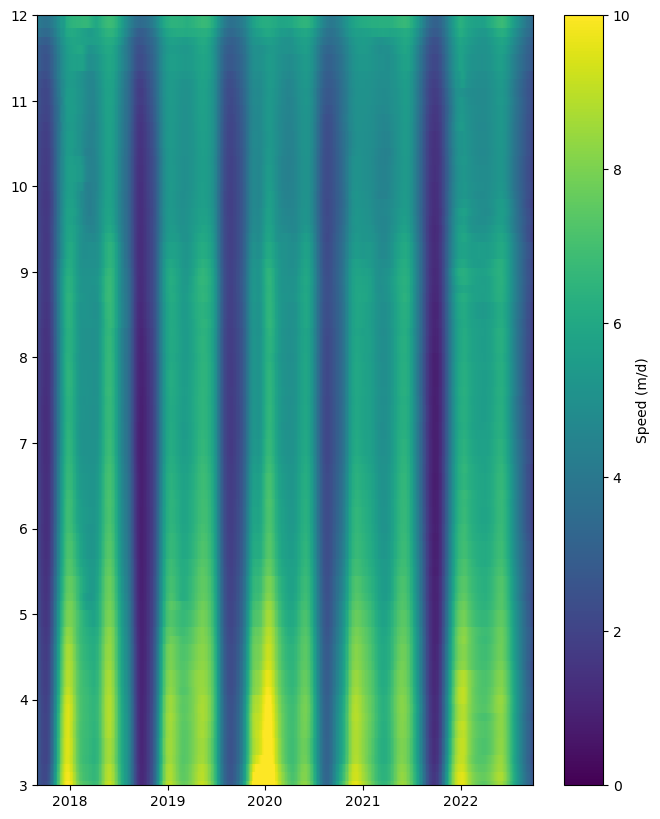

In [58]:
plt.figure(figsize=(8, 10))
plt.pcolormesh(tsteps,np.arange(len(points))/10,speeds.T/365,vmin=0,vmax=10)
plt.ylim([3,12])
plt.xlim(np.datetime64("2017-09-01"), np.datetime64("2022-10-01"))
plt.colorbar(label="Speed (m/d)")
plt.savefig('v3.png')


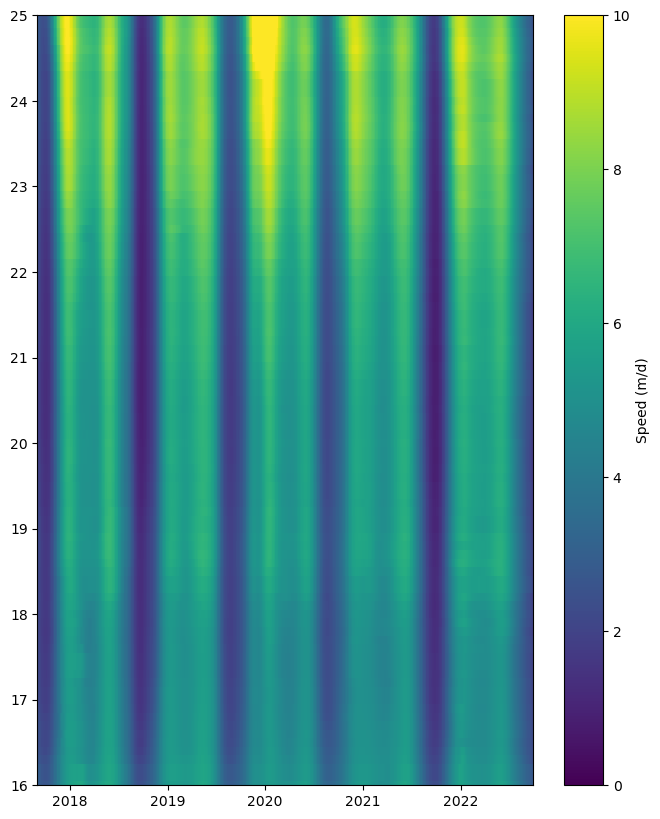

In [59]:
plt.figure(figsize=(8, 10))
plt.pcolormesh(tsteps,np.arange(len(points))/10,np.flipud(speeds.T)/365,vmin=0,vmax=10)
plt.ylim([16,25])
plt.xlim(np.datetime64("2017-09-01"), np.datetime64("2022-10-01"))
plt.colorbar(label="Speed (m/d)")
plt.savefig('v4.png')

In [51]:
0.26/60/11

0.0003939393939393939